+--------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+---------------------+--------------------+----------------------+-----------------+--------------------+-------------------+-------------------+-------------------+-------------------+----------------+----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+---------------------+---------------------+--------------------+--------------------+---------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+--------------------+-------------------+------------------

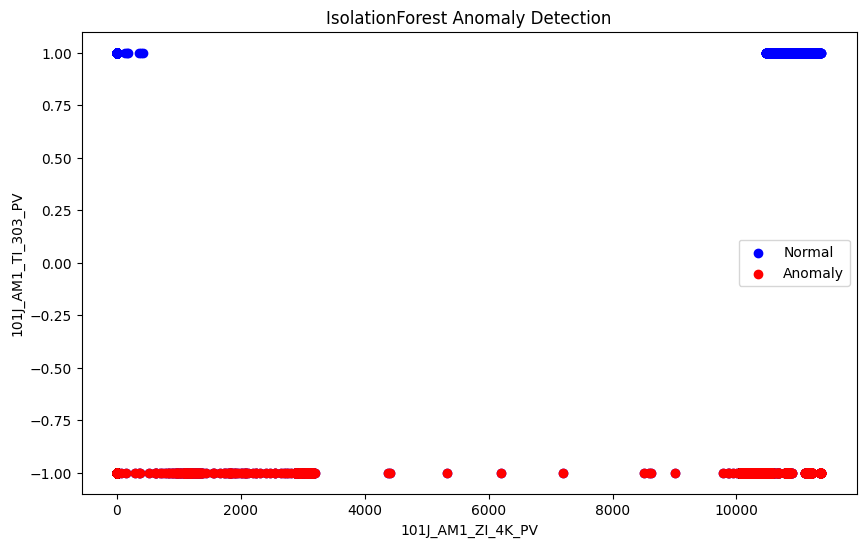

In [2]:
from pyspark.sql import SparkSession
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Tạo Spark session
spark = SparkSession.builder.appName("AnomalyDetection").getOrCreate()

# Đọc file CSV
df = spark.read.csv("../../../data/101.csv", header=True, inferSchema=True)

# Hiển thị dữ liệu
df.show()

# Chuyển đổi DataFrame của Spark thành Pandas DataFrame
pandas_df = df.toPandas()

# Lấy danh sách header và bỏ qua cột đầu tiên
columns = df.columns[1:]

# Chọn các cột cần thiết (bỏ qua cột đầu tiên)
features = pandas_df[columns].values

# Sử dụng IsolationForest để phát hiện bất thường
model = IsolationForest(contamination=0.1)  # Đặt mức độ bất thường mong muốn
model.fit(features)

# Dự đoán các điểm bất thường
predictions = model.predict(features)

target = "101J_AM1_TI_303_PV"
# Thêm cột dự đoán vào DataFrame
pandas_df[target] = predictions

# Hiển thị kết quả dưới dạng biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ các điểm dữ liệu
plt.scatter(pandas_df[columns[0]], pandas_df[columns[1]], c='blue', label="Normal")

# Vẽ các điểm bất thường
anomalies = pandas_df[pandas_df[target] == -1]
plt.scatter(anomalies[columns[0]], anomalies[columns[1]], c='red', label="Anomaly")

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend()
plt.title("IsolationForest Anomaly Detection")
plt.show()
